[ 심장 질환 발생 여부 예측 ]
- dataset (71,994)
    * train : 55,795
    * test  : 16,199
- 종속변수 : target - 심장질환 발생여부(0:부, 1:여)

- 독립변수(13개) :
    - cp 가슴통증유형 (범주형, 0~3)
    - restecg안정 심전도 결과 (범주형, 0~2)
    - slope ST분절 기울기 (범주형, 0~2)
    - thal 결손성 혈류 장애 (범주형, 0~3)
    - ca 주요 혈관 수 ( Discrete (0~4) )
    - age 나이 (연속형)
    - trestbps 안정 혈압 (연속형)
    - chol 혈중 총 콜레스테롤 수치 (연속형)
    - thalach 최대 심박수 (연속형)
    - oldpeak ST분절 하강 (연속형)
    - sex 성별 (여자:0, 남자:1 / Binary)
    - fbs 공복 혈당 (Fasting Blood Sugar > 120 mg/dL → 1, else 0, (Binary))
    - exang 운동 유발 협심증 (Exercise Induced Angina, 1=Yes, 0=No , (Binary))

- 독립변수 인코딩 방법

    * 범주형 변수는 One-Hot Encoding
        - cp 가슴통증유형 (범주형, 0~3)
        - restecg안정 심전도 결과 (범주형, 0~2)
        - slope ST분절 기울기 (범주형, 0~2)
        - thal 결손성 혈류 장애 (범주형, 0~3)
    * 순서형 변수(ordinal feature)
        - One-Hot Encoding보다는 Ordinal Encoding
        - ca 주요 혈관 수 ( Discrete (0~4)) : 이 변수는 연속형 변수이지만 범주형 변수로도 볼 수 있기 때문에 범주형 변수라고 가정하고 인코딩
    * 연속형 변수는 minmaxScaler또는 StandardScaler 또는 RobustScaler를 사용
        - age 나이 (연속형)
        - trestbps 안정 혈압 (연속형)
        - chol 혈중 총 콜레스테롤 수치 (연속형)
        - thalach 최대 심박수 (연속형)
        - oldpeak ST분절 하강 (연속형)
    * Binary 변수는 원본 그대로 사용
        - sex 성별 (여자:0, 남자:1 / Binary)
        - fbs 공복 혈당 (Fasting Blood Sugar > 120 mg/dL → 1, else 0, (Binary))
        - exang 운동 유발 협심증 (Exercise Induced Angina, 1=Yes, 0=No , (Binary)) 


- 학습종류 : 분류이며 지도학습

    * 지도학습인 이유?
        : 지도학습은 입력데이터(Feature)와 정답(Labels)가 있는 경우 학습하는 방법을 말함. 해당 데이터는 target이 1,0으로 되어 있음. 머신러닝 모델이 입력데이터(X)와 정답(Y)을 이용하여 학습하기 때문에 이 모델은 지도학습이다.
- 알고리즘(5개) : 
    * Logistic Regression, 
    * Random Forest, XGBoost, 
    * SVM (Support Vector Machine), 
    * Neural Network (MLP, DNN)

In [238]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [239]:
dataset_train = pd.read_csv(r"C:\Users\KDT-37\Desktop\KDT_7\08_ML\project\data\train.csv")

In [306]:
dataset_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
1,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
2,34,0,1,118,210,0,1,192,0,0.0,2,0,2,1
3,51,1,0,140,298,0,1,122,1,0.0,1,3,3,0
4,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


[ 데이터 확인 ]<hr>

In [240]:
# trainDF 

dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1015 non-null   int64  
 1   sex       1015 non-null   int64  
 2   cp        1015 non-null   int64  
 3   trestbps  1015 non-null   int64  
 4   chol      1015 non-null   int64  
 5   fbs       1015 non-null   int64  
 6   restecg   1015 non-null   int64  
 7   thalach   1015 non-null   int64  
 8   exang     1015 non-null   int64  
 9   oldpeak   1015 non-null   float64
 10  slope     1015 non-null   int64  
 11  ca        1015 non-null   int64  
 12  thal      1015 non-null   int64  
 13  target    1015 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 111.1 KB


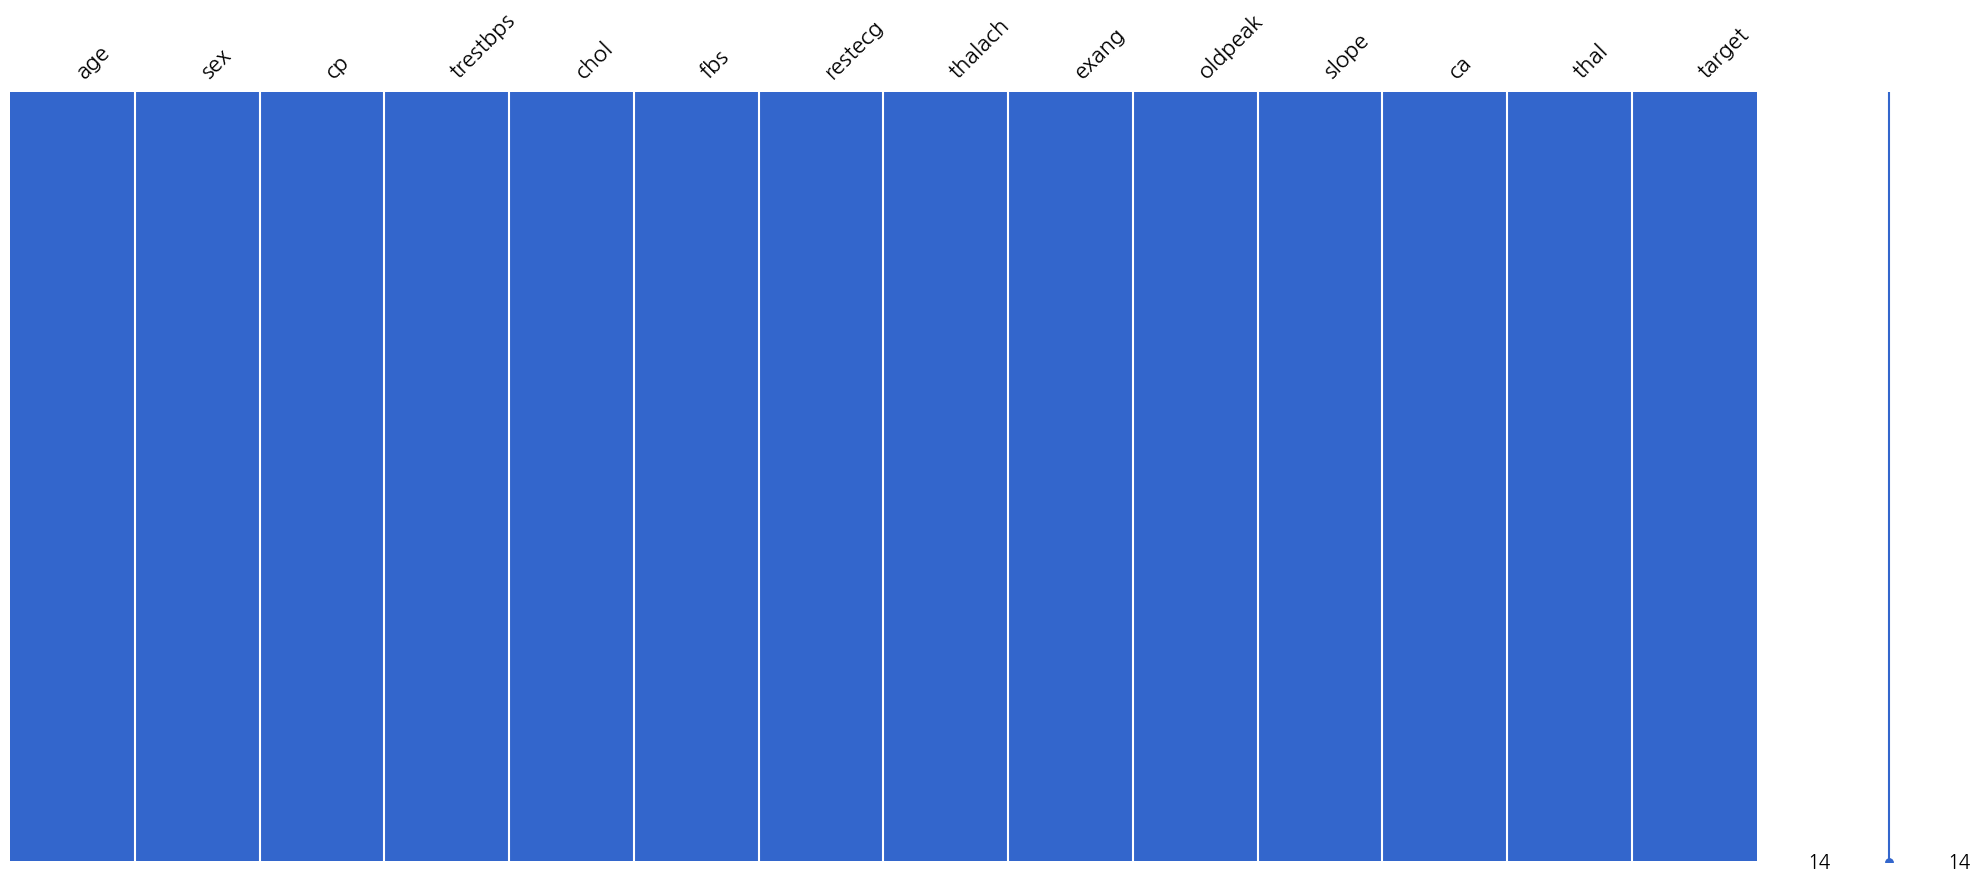

In [315]:
import missingno as msno
msno.matrix(dataset_train, color=(0.2, 0.4, 0.8))
plt.xticks(rotation=45)  # X축 레이블을 45도 회전
plt.yticks([])  # Y축 숨기기
plt.show()

In [241]:
# missing value check -> zero

dataset_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### [데이터 탐색]

[ Feature ]<hr>

In [316]:
categorical_val = []  # 범주형 변수 리스트를 저장할 빈 리스트
continous_val = []    # 연속형 변수 리스트를 저장할 빈 리스트

# dataset_train의 각 열(column)을 반복하며 확인
for column in dataset_train.columns:
    # 해당 열에서 고유 값의 개수가 10개 이하이면 범주형 변수로 간주
    if len(dataset_train[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [317]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [318]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [244]:
import hvplot.pandas 

have_disease = dataset_train.loc[dataset_train['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = dataset_train.loc[dataset_train['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [sex]   (count)
   .Bars.Count.II :Bars   [sex]   (count)

In [245]:
have_disease = dataset_train.loc[dataset_train['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = dataset_train.loc[dataset_train['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [cp]   (count)
   .Bars.Count.II :Bars   [cp]   (count)

In [246]:
have_disease = dataset_train.loc[dataset_train['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = dataset_train.loc[dataset_train['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [fbs]   (count)
   .Bars.Count.II :Bars   [fbs]   (count)

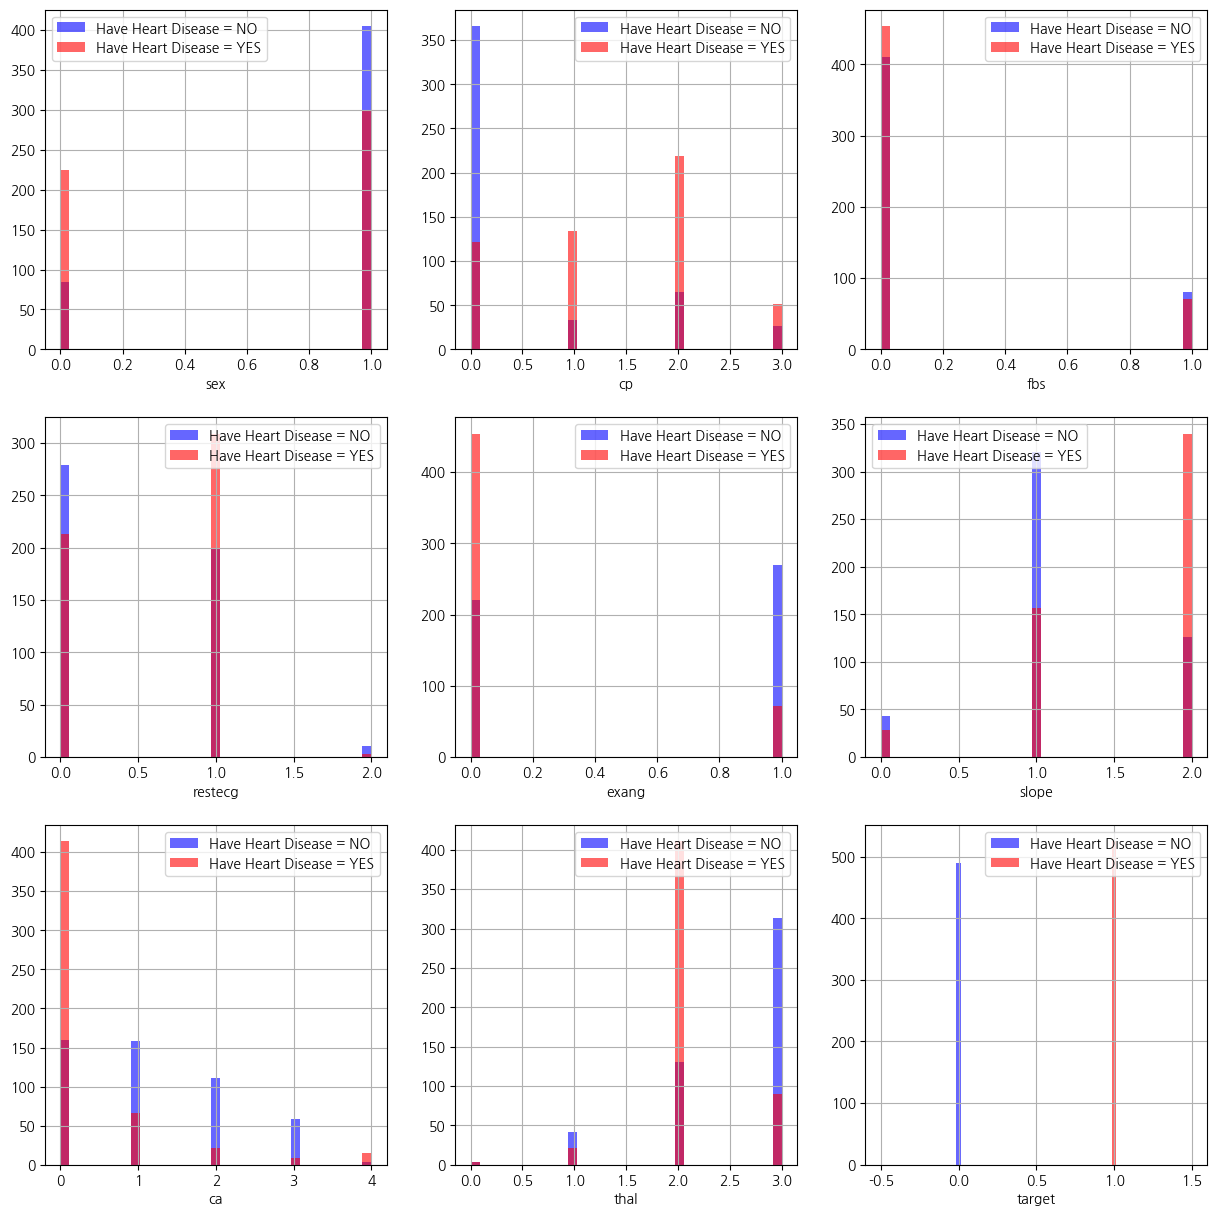

In [247]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    dataset_train[dataset_train["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset_train[dataset_train["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

[ Label ]<hr>

In [248]:
dataset_train.target.value_counts()

target
1    525
0    490
Name: count, dtype: int64

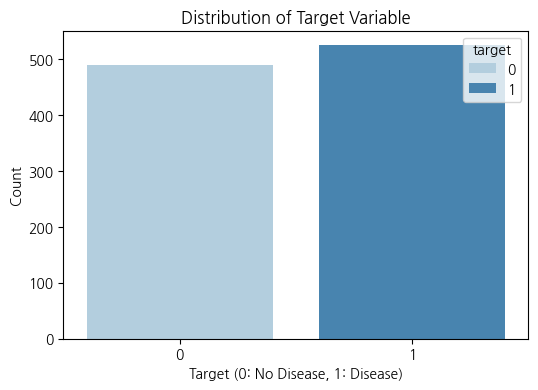

In [249]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset_train["target"], hue=dataset_train["target"], palette="Blues")
plt.title("Distribution of Target Variable")
plt.xlabel("Target (0: No Disease, 1: Disease)")
plt.ylabel("Count")
plt.show()   

[ 변수별 데이터 분포 확인 - 연속형 변수 ]<hr>

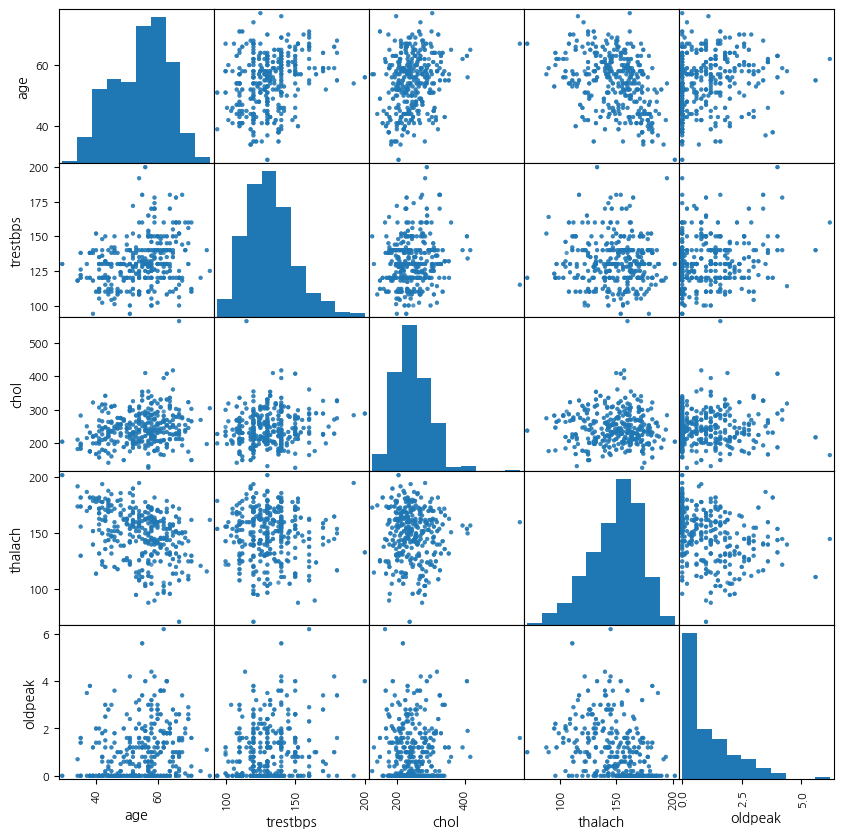

In [250]:
from pandas.plotting import scatter_matrix

# 연속형 변수
# 산점도 행렬 그리기
scatter_matrix(dataset_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], figsize=(10, 10), diagonal='hist', alpha=0.5)
plt.show()

- age (나이): 40~60대가 많으며, 정규분포에 가까운 형태를 보임.
- trestbps (안정 시 혈압): 평균적으로 120~140mmHg 사이에 집중됨. 약간 오른쪽으로 긴 꼬리가 있는 형태.
- chol (혈중 콜레스테롤 수치): 약 200~300 사이에 많이 분포. 오른쪽으로 긴 꼬리(positive skewness)가 있어 일부 높은 값이 존재함.
- thalach (최대 심박수): 120~180 사이에서 집중됨. 전반적으로 정규분포와 비슷한 형태지만 약간 왼쪽으로 치우침.
- oldpeak (운동 유발 ST 감소량): 대부분 0~2 사이에 집중되어 있으며, 극단적으로 높은 값(5~6 이상)도 존재함. 오른쪽으로 긴 꼬리 분포(positive skewed)

< 산점도 행렬 분석 >

    1. age, trestbps, chol, thalach는 대부분 정규분포와 유사한 형태를 가짐.
    2. oldpeak는 오른쪽으로 긴 꼬리를 가지며 이상치가 존재할 가능성이 높음.

< 변수 간 관계 >

    1. age와 thalach는 약한 음의 상관관계를 보임 (나이가 많을수록 최대 심박수 감소).
    2. trestbps와 chol은 약한 양의 상관관계를 보일 가능성이 있음.
    3. 나머지 변수들은 거의 상관관계가 없음.

< 추가 분석 필요 사항 >

    1. oldpeak의 이상치 확인
    2. chol과 thalach의 높은 값 확인 (이상값인지 검토)
    3. 상관계수(heatmap) 분석을 통해 보다 정확한 관계 파악 가능

[ 이상치 제거 ]<hr>
- chol, oldpeak 변수 이상치 제거 해야함

In [251]:
# chol의 이상치 제거 (IQR 방식)
Q1_chol = dataset_train["chol"].quantile(0.25)
Q3_chol = dataset_train["chol"].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol  # IQR 계산
lower_bound_chol = Q1_chol - 1.5 * IQR_chol
upper_bound_chol = Q3_chol + 1.5 * IQR_chol
dataset_train = dataset_train[(dataset_train["chol"] >= lower_bound_chol) & (dataset_train["chol"] <= upper_bound_chol)]  # 이상치 제거

In [252]:
# oldpeak 값에서 0을 추가하여 편향된 분포를 모방
dataset_train.loc[np.random.choice(dataset_train.index, size=300, replace=False), "oldpeak"] = 0

# # oldpeak를 이진 변수로 변환
# # oldpeak > 0이면 1, oldpeak = 0이면 0
# dataset_train["binary_oldpeak"] = (dataset_train["oldpeak"] > 0).astype(int)

# # 원래 oldpeak 컬럼 삭제
# dataset_train.drop(columns=["oldpeak"], inplace=True)

# **oldpeak의 이상치 제거 (0 값 유지)**
Q1_oldpeak = dataset_train["oldpeak"].quantile(0.25)
Q3_oldpeak = dataset_train["oldpeak"].quantile(0.75)
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak
lower_bound_oldpeak = Q1_oldpeak - 1.5 * IQR_oldpeak
upper_bound_oldpeak = Q3_oldpeak + 1.5 * IQR_oldpeak

# oldpeak 값이 0이거나 이상치 범위 내에 있는 값만 유지
dataset_train = dataset_train[(dataset_train["oldpeak"] == 0) | ((dataset_train["oldpeak"] >= lower_bound_oldpeak) & (dataset_train["oldpeak"] <= upper_bound_oldpeak))]

In [253]:
# 결과 확인
print(f"이상치 제거 후 데이터 크기: {dataset_train.shape}")
print(dataset_train.info())

이상치 제거 후 데이터 크기: (952, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 1014
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       952 non-null    int64  
 1   sex       952 non-null    int64  
 2   cp        952 non-null    int64  
 3   trestbps  952 non-null    int64  
 4   chol      952 non-null    int64  
 5   fbs       952 non-null    int64  
 6   restecg   952 non-null    int64  
 7   thalach   952 non-null    int64  
 8   exang     952 non-null    int64  
 9   oldpeak   952 non-null    float64
 10  slope     952 non-null    int64  
 11  ca        952 non-null    int64  
 12  thal      952 non-null    int64  
 13  target    952 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 111.6 KB
None


[ 연속형 변수 이상치 제거 확인 - 산점도 행렬 ]<hr>

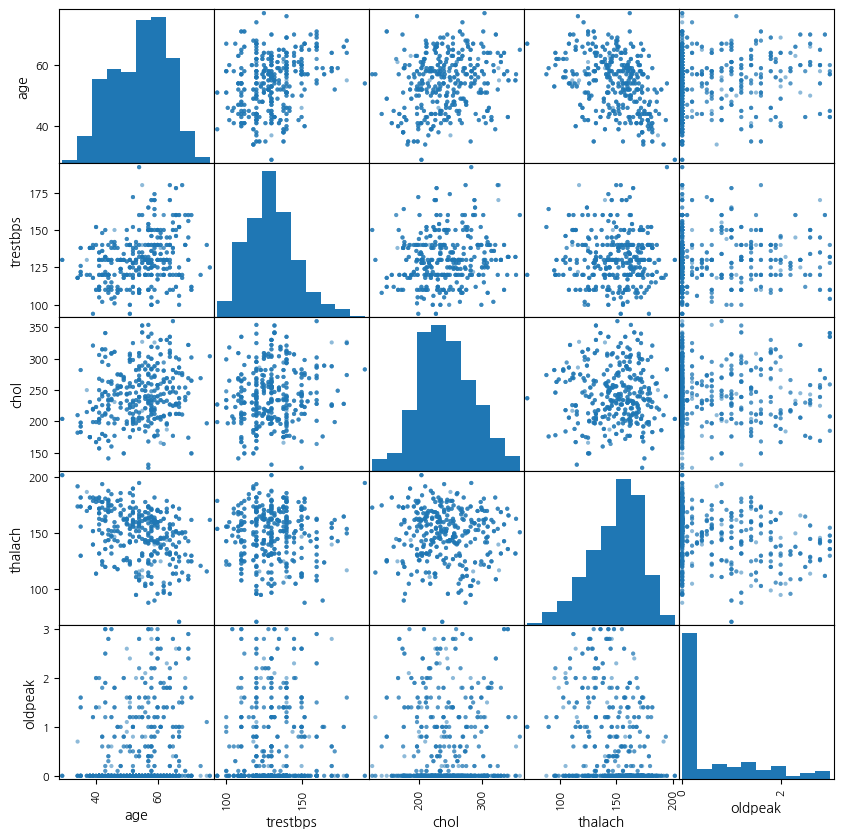

In [254]:
# 산점도 행렬 -> 이상치 제거 확인
scatter_matrix(dataset_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], figsize=(10, 10), diagonal='hist', alpha=0.5)
plt.show()

[ 변수 확인 ]<hr>

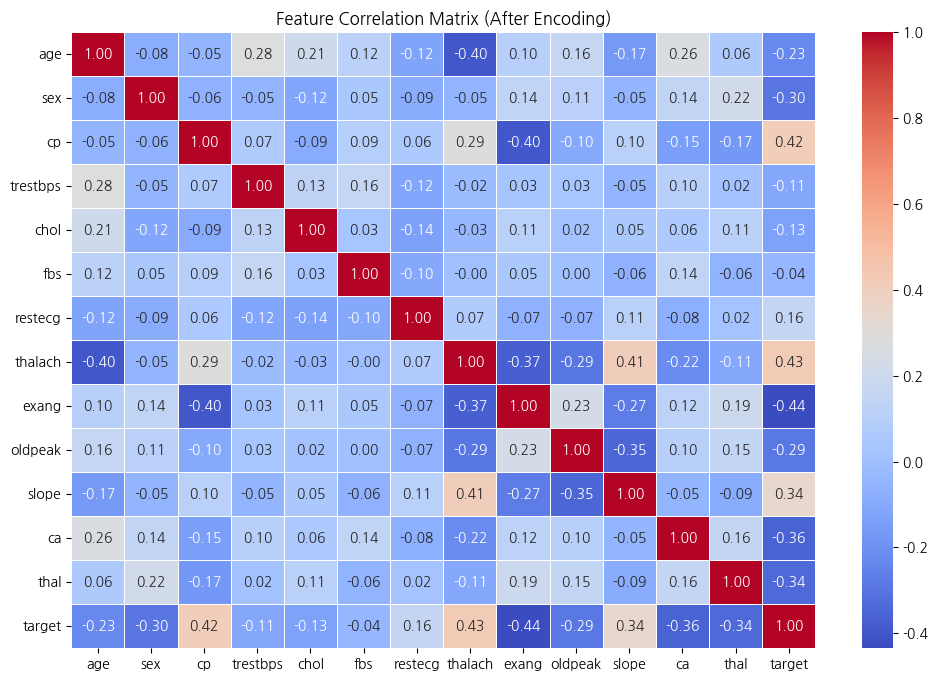

In [320]:
import seaborn as sns

# 이상치 제거된 데이터셋
plt.figure(figsize=(12, 8))
sns.heatmap(dataset_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix (After Encoding)")
plt.show()

[ 연속형 변수의 분포 확인 ]<hr>

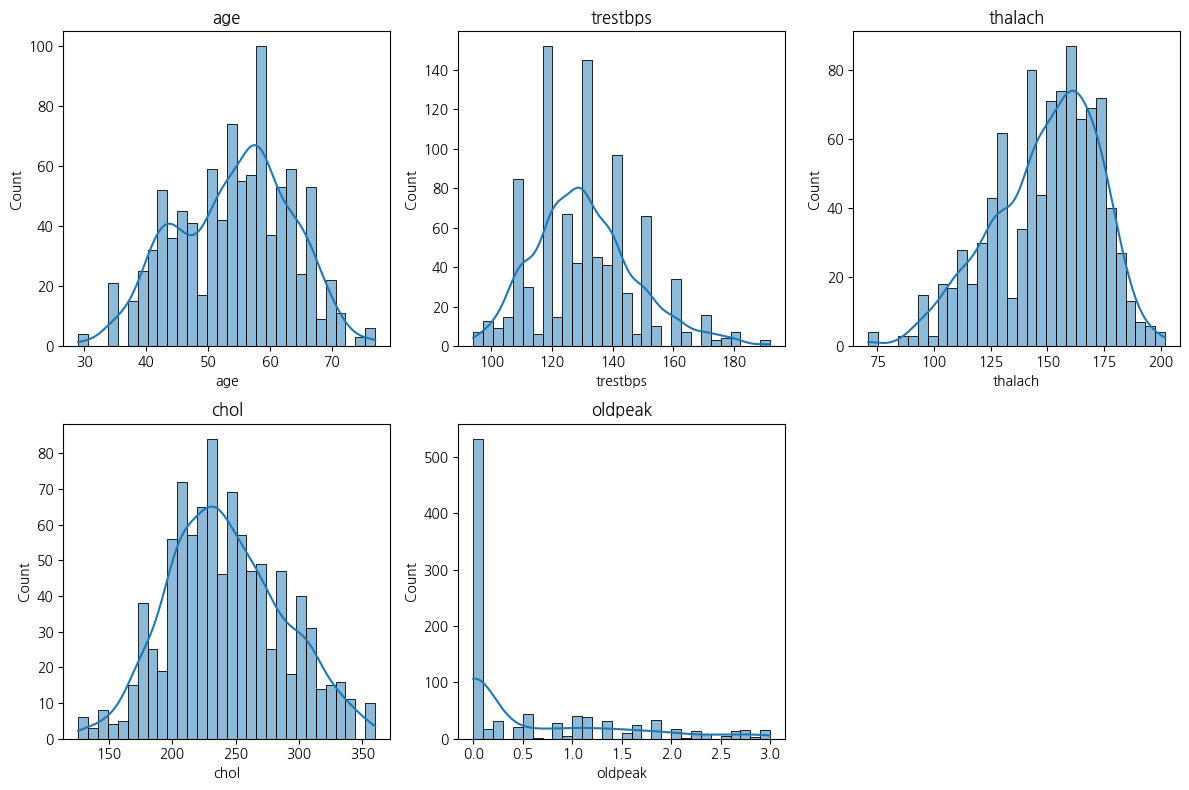

In [256]:
# 연속형 변수의 분포 확인
numerical_features = ['age', 'trestbps', 'thalach', 'chol', 'oldpeak']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(dataset_train[feature], kde=True, bins=30)
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

[ 다중공선성 확인 ]<hr>

In [257]:
dataset_train[['age', 'trestbps', 'thalach', 'chol','oldpeak']].corr()

,age,trestbps,thalach,chol,oldpeak
age,1.000000,0.277877,-0.398962,0.205745,0.164658
trestbps,0.277877,1.000000,-0.015082,0.128004,0.031008
thalach,-0.398962,-0.015082,1.000000,-0.034520,-0.289546
chol,0.205745,0.128004,-0.034520,1.000000,0.018485
oldpeak,0.164658,0.031008,-0.289546,0.018485,1.000000


In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립 변수(X) 선택
X_numeric_train = dataset_train[['age', 'trestbps', 'thalach', 'chol','oldpeak']]

# VIF 계산
vif_data_train = pd.DataFrame()
vif_data_train["Feature"] = X_numeric_train.columns
vif_data_train["VIF"] = [variance_inflation_factor(X_numeric_train.values, i) for i in range(X_numeric_train.shape[1])]

print(vif_data_train)

    Feature        VIF
0       age  37.075290
1  trestbps  57.647979
2   thalach  28.691319
3      chol  29.396471
4   oldpeak   1.570076


In [259]:
# 가장 높은 VIF를 가진 'trestbps' 제거 후 다시 VIF 계산
X_reduced = X_numeric_train.drop(columns=['trestbps'])  # 다중공선성이 심각한 변수 제거

# VIF 재계산
vif_data_train = pd.DataFrame()
vif_data_train["Feature"] = X_reduced.columns
vif_data_train["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print(vif_data_train)

   Feature        VIF
0      age  24.638201
1  thalach  19.829068
2     chol  28.315683
3  oldpeak   1.559636


In [260]:
# 가장 높은 VIF를 가진 'chol', 'trestbps' 제거 후 다시 VIF 계산
X_reduced = X_numeric_train.drop(columns=['chol', 'trestbps'])  # 다중공선성이 심각한 변수 제거

# VIF 재계산
vif_data_train = pd.DataFrame()
vif_data_train["Feature"] = X_reduced.columns
vif_data_train["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print(vif_data_train)

   Feature        VIF
0      age  15.986547
1  thalach  14.575461
2  oldpeak   1.554725


In [261]:
# 가장 높은 VIF를 가진 'chol', 'trestbps', 'age' 제거 후 다시 VIF 계산
X_reduced = X_numeric_train.drop(columns=['chol', 'trestbps', 'age'])  # 다중공선성이 심각한 변수 제거

# VIF 재계산
vif_data_train = pd.DataFrame()
vif_data_train["Feature"] = X_reduced.columns
vif_data_train["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print(vif_data_train)

   Feature       VIF
0  thalach  1.375482
1  oldpeak  1.375482


* 일단 모든 변수 사용해서 모델링 후 선택 변수만 모델링
* 마지막에 최종 연속형 변수는 oldpeak, thalach 결정

[ 정규화된 연속형 변수의 분포 확인 ]<hr>

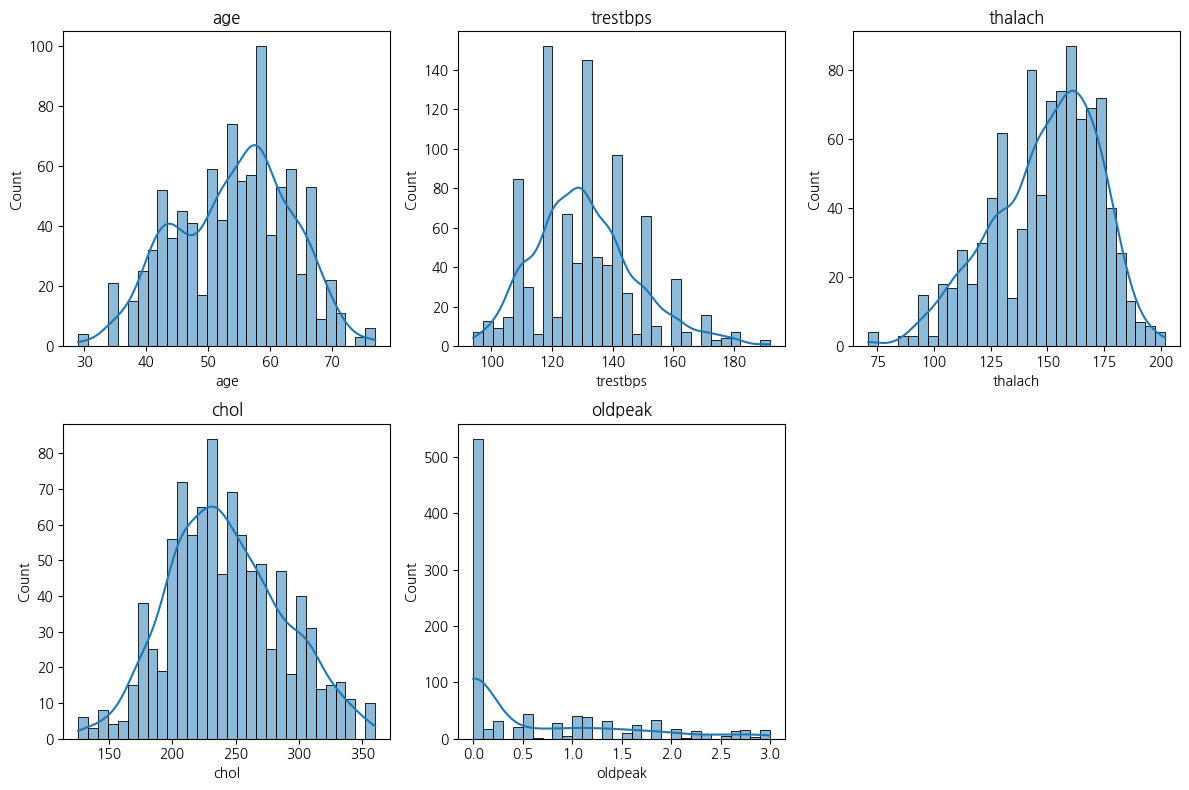

In [262]:
# 정규화전 연속형 변수의 분포 확인
numerical_features = ['age', 'trestbps', 'thalach', 'chol', 'oldpeak']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(dataset_train[feature], kde=True, bins=30)
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()

[ 각 변수들간의 관계성 파악 ]<hr>

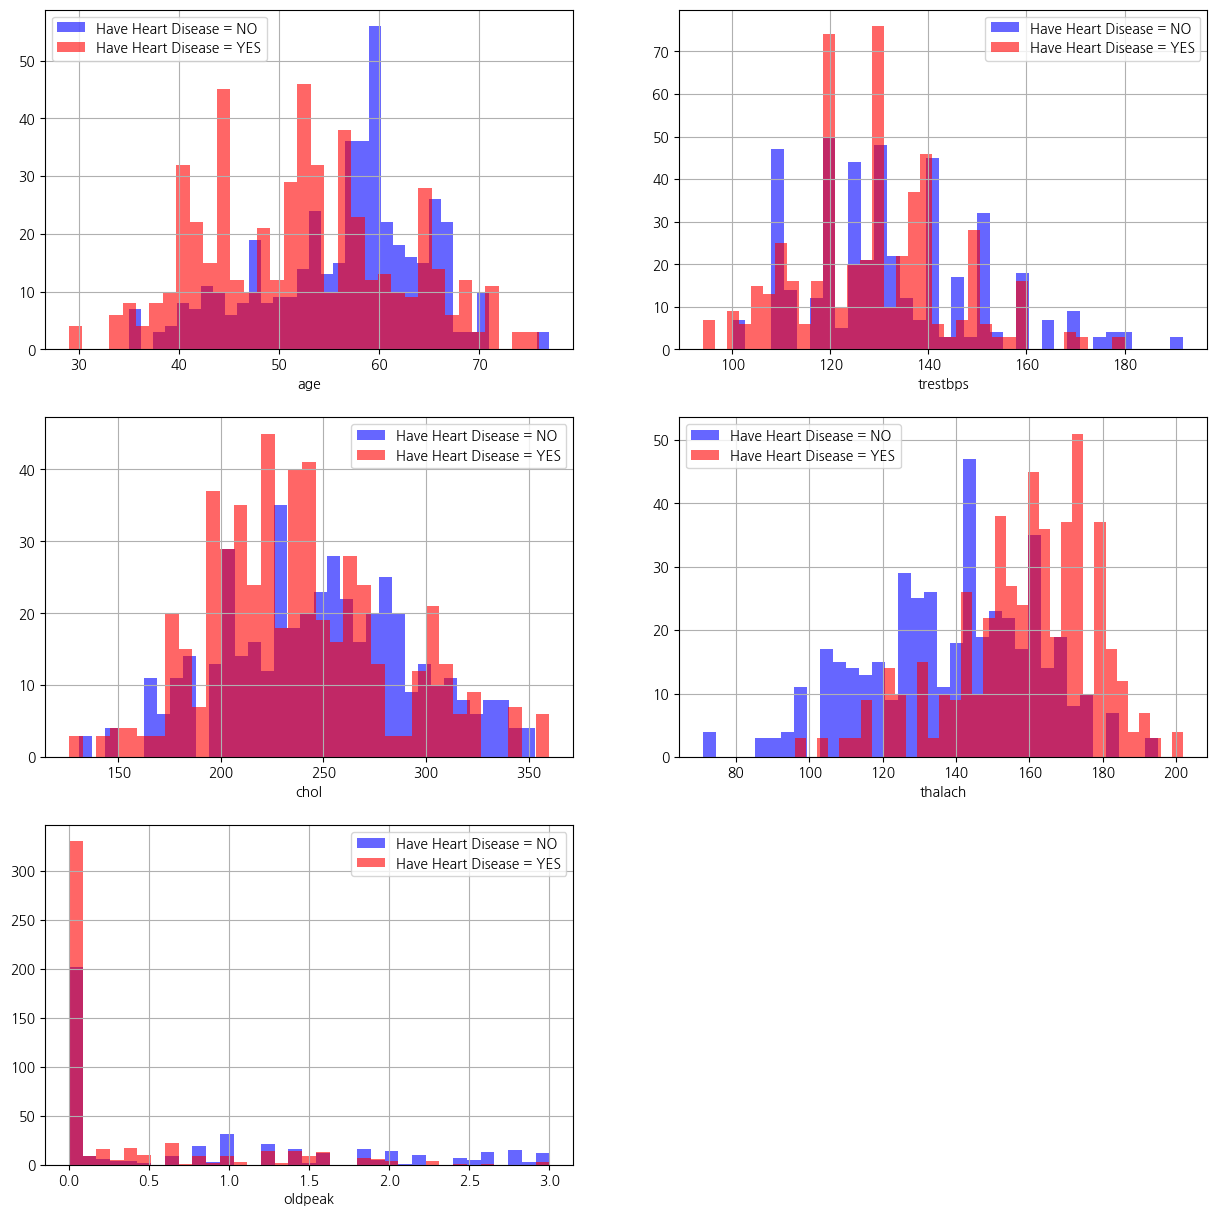

In [263]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    dataset_train[dataset_train["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset_train[dataset_train["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [264]:
def snsPairGrid(df):
    ''' Plots a Seaborn PairGrid w/ KDE & scatter plot of df features'''
    
    # PairGrid 설정
    g = sns.PairGrid(df, diag_sharey=False, hue='target', palette=['#2c3e50', '#E888BB'])
    g.fig.set_size_inches(13, 13)

    # 위쪽 삼각형 - KDE 밀도 등고선
    g.map_upper(sns.kdeplot, levels=5, fill=True, alpha=0.5)

    # 대각선 - 단변량 KDE 플롯
    g.map_diag(sns.kdeplot, lw=2, fill=True)

    # 아래쪽 삼각형 - 산점도 플롯
    g.map_lower(sns.scatterplot, s=30, edgecolor="w", linewidth=0.8, alpha=0.7)

    # 범례 추가
    g.add_legend()
    
    # 레이아웃 조정
    plt.tight_layout()

    return g  # 반환하여 추가 조정 가능하도록 변경


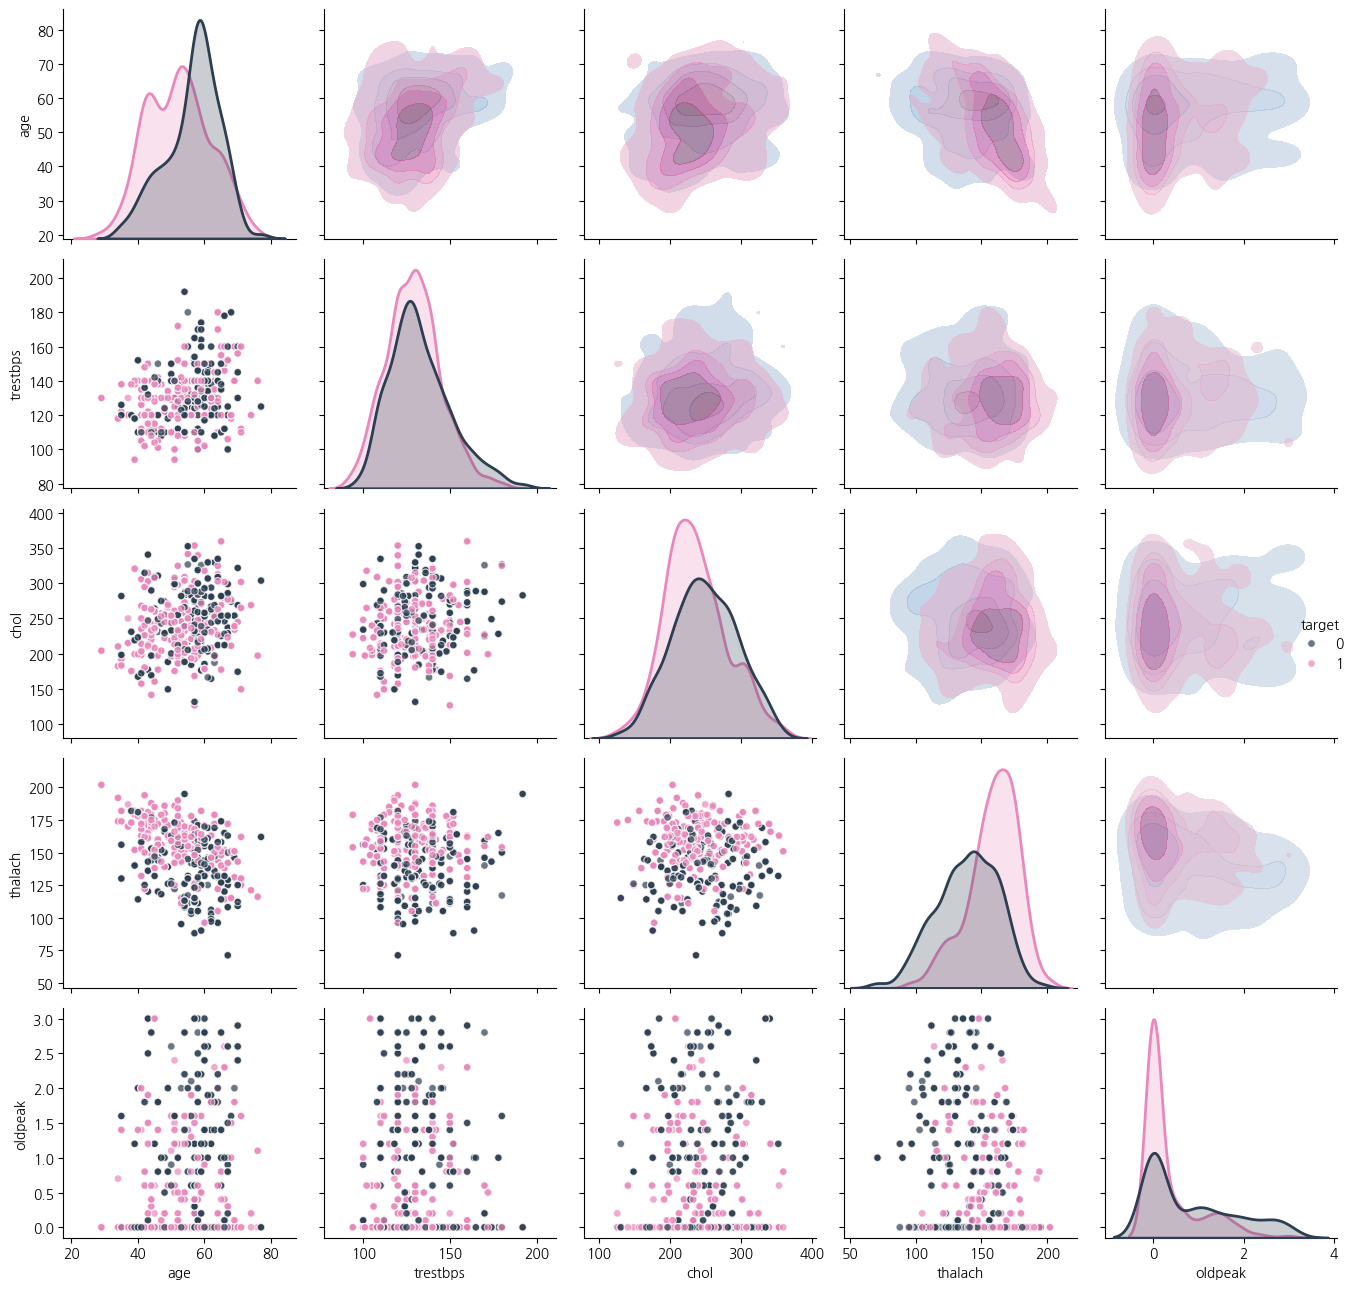

In [265]:
# train dataset
numvars_targ = ['age','trestbps','chol','thalach','oldpeak','target']
snsPairGrid(dataset_train[numvars_targ])

< 변수별 해석 >
    1. age (나이)
    밀도 그래프(KDE)를 보면 target=1(심장병)의 분포가 target=0(정상)보다 약간 더 높음
    즉, 나이가 많을수록 심장병 위험이 증가할 가능성이 큼
    age는 심장병과 일정한 연관성이 있는 변수로 보임
    2. trestbps (휴식 시 혈압)
    target=0과 target=1의 분포가 거의 겹침 → 차이가 크지 않음
    따라서 이 변수 단독으로는 심장병을 예측하는 데 큰 영향을 주지 않을 가능성이 있음
    하지만 다른 변수(예: oldpeak 등)와의 조합을 고려할 필요가 있음
    3. chol (콜레스테롤, 로그 변환됨)
    target=1(심장병)과 target=0(정상)의 분포가 크게 차이나지 않음
    고콜레스테롤(높은 chol 값)에서도 target=0과 target=1이 비슷하게 분포
    콜레스테롤 수치가 심장병과 직접적인 연관이 강하지 않을 가능성이 큼
    4. thalach (최대 심박수)
    target=0(정상) 그룹은 높은 심박수(175~200)에서도 존재
    하지만 target=1(심장병) 그룹은 최대 심박수가 낮은 쪽에서 더 많이 분포
    즉, 최대 심박수가 낮을수록 심장병 위험이 증가할 가능성이 큼
    thalach는 심장 건강의 중요한 지표이므로, 모델에서 중요한 변수로 사용 가능
    5. oldpeak (운동 중 ST 하강량, 로그 변환됨)
    oldpeak = 0인 값이 많음 (정상 상태)
    target=1(심장병) 그룹에서 oldpeak 값이 높은 경향이 보임
    즉, oldpeak 값이 클수록 심장병 위험이 증가할 가능성이 있음
    oldpeak는 심장 건강을 평가하는 중요한 지표이므로, 모델에서 중요한 역할을 할 가능성이 큼

In [266]:
dataset_train.drop('target', axis=1).corrwith(dataset_train.target).hvplot.barh(
    width=600, height=400, 
    title="심장 질환과 독립변수들 간의 상관관계", 
    ylabel='상관관계', xlabel='독립변수',
)

:Bars   [index]   (0)

* 심장병 예측에 중요한 변수: thal, ca, slope, oldpeak, thalach
* 상관관계가 크지 않은 변수: chol, trestbps, fbs
* 성별(sex)과 나이(age)는 약한 관계지만 고려 가능
* 모델 학습 시 oldpeak, thalach, slope, ca 등을 중요하게 다루는 것이 효과적

[ 독립변수, 종속변수 설정 ]<hr>

In [267]:
# 범주형 변수 리스트 설정 (target 제거)
categorical_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
categorical_val = categorical_val.copy()  # 원본 보호
categorical_val.remove('target')  # 'target' 제거

# One-Hot Encoding 수행 (True/False → 0/1 변환 포함)
dataset = pd.get_dummies(dataset_train, columns=categorical_val).astype(int)

In [268]:
# 연속형 변수 정규화
from sklearn.preprocessing import StandardScaler

col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# StandardScaler 객체 생성
scaler = StandardScaler()

dataset[col_to_scale] = scaler.fit_transform(dataset[col_to_scale])


In [269]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1.839251,-1.116473,-2.074921,-1.050890,0.849553,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,-1.215966,0.074765,2.182149,-0.578069,3.682387,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,-2.198000,-0.759101,-0.722414,1.829023,-0.566864,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,-0.343047,0.551260,1.228743,-1.179842,-0.566864,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.233932,-0.163482,-0.855448,0.281607,0.849553,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0


In [270]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

# 독립 변수(X)와 종속 변수(y) 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 크기 확인 (정상적으로 맞춰졌는지 확인)
print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)

훈련 데이터 크기: (666, 30) (666,)
테스트 데이터 크기: (286, 30) (286,)


In [271]:
# X_train, X_test => 2차원
# y_train, y_test => 1차원
print("X_train shape:", X_train.shape)  
print("X_test shape:", X_test.shape)    
print("y_train shape:", y_train.shape)  
print("y_test shape:", y_test.shape)

X_train shape: (666, 30)
X_test shape: (286, 30)
y_train shape: (666,)
y_test shape: (286,)


[ 예측값 함수 ]<hr>

In [272]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

[ 모델링 - Logistic Regression ]<hr>

In [273]:
from sklearn.linear_model import LogisticRegression

In [274]:
# 로지스틱 회귀 모델 생성 및 학습
lr_clf = LogisticRegression(solver='liblinear')
results_lr_clf = lr_clf.fit(X_train, y_train)

# 예측 수행
y_pred = lr_clf.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# 결과 출력
print(f"모델 정확도: {accuracy:.4f}")
print("\n혼동 행렬:\n", conf_matrix)
print("\n분류 보고서:\n", classification_rep)


모델 정확도: 0.8392

혼동 행렬:
 [[105  27]
 [ 19 135]]

분류 보고서:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       132
           1       0.83      0.88      0.85       154

    accuracy                           0.84       286
   macro avg       0.84      0.84      0.84       286
weighted avg       0.84      0.84      0.84       286



In [275]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.387387,83.916084


[ K-nearest neighbors model ]<hr>

In [276]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
results_knn_clf = knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.930921    0.928177  0.929429    0.929549      0.929450
recall       0.915858    0.941176  0.929429    0.928517      0.929429
f1-score     0.923328    0.934631  0.929429    0.928980      0.929387
support    309.000000  357.000000  0.929429  666.000000    666.000000
_______________________________________________
Confusion Matrix: 
 [[283  26]
 [ 21 336]]

Test Result:
Accuracy Score: 80.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.806452    0.802469  0.804196    0.804460      0.804307
recall       0.757576    0.844156  0.804196    0.800866      0.804196
f1-score     0.781250    0.822785  0.804196    0.802017      0.803615
support    132.000000  154.000000  0.804196  286.000000    286.

In [277]:
# 모델 성능 평가
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100 
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

# 새로운 결과 데이터 생성
results_df_2 = pd.DataFrame([["K-nearest neighbors", train_score, test_score]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = pd.concat([results_df, results_df_2], ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.387387,83.916084
1,K-nearest neighbors,92.942943,80.419580


[ Support Vector machine (SVM) ]<hr>
- 이진 분류(Binary Classification) 문제에서 뛰어난 성능을 보이며, 마진(Margin) 최대화를 통해 최적의 결정 경계를 찾음

In [278]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
results_svm_clf = svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.963455    0.947945  0.954955    0.955700      0.955141
recall       0.938511    0.969188  0.954955    0.953850      0.954955
f1-score     0.950820    0.958449  0.954955    0.954634      0.954909
support    309.000000  357.000000  0.954955  666.000000    666.000000
_______________________________________________
Confusion Matrix: 
 [[290  19]
 [ 11 346]]

Test Result:
Accuracy Score: 89.51%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.904762    0.887500  0.895105    0.896131      0.895467
recall       0.863636    0.922078  0.895105    0.892857      0.895105
f1-score     0.883721    0.904459  0.895105    0.894090      0.894887
support    132.000000  154.000000  0.895105  286.000000    286.

In [279]:
# 모델 성능 평가
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100 
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

# 새로운 결과 데이터 생성
results_df_3 = pd.DataFrame([["Support Vector machine", train_score, test_score]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = pd.concat([results_df, results_df_3], ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.387387,83.916084
1,K-nearest neighbors,92.942943,80.419580
2,Support Vector machine,95.495495,89.510490


[ Decision Tree Classifier ]<hr>

In [280]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
results_tree_clf = tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    309.0  357.0       1.0      666.0         666.0
_______________________________________________
Confusion Matrix: 
 [[309   0]
 [  0 357]]

Test Result:
Accuracy Score: 98.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.980892   0.98951    0.990446      0.989711
recall       0.977273    1.000000   0.98951    0.988636      0.989510
f1-score     0.988506    0.990354   0.98951    0.989430      0.989501
support    132.000000  154.000000   0.98951  286.000000    286.000000
_______________________________________________

In [281]:
# 모델 성능 평가
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100 
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

# 새로운 결과 데이터 생성
results_df_4 = pd.DataFrame([["Decision Tree Classifier", train_score, test_score]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = pd.concat([results_df, results_df_4], ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.387387,83.916084
1,K-nearest neighbors,92.942943,80.419580
2,Support Vector machine,95.495495,89.510490
3,Decision Tree Classifier,100.000000,98.951049


[  Random Forest ]<hr>

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
results_rf_clf = rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    309.0  357.0       1.0      666.0         666.0
_______________________________________________
Confusion Matrix: 
 [[309   0]
 [  0 357]]

Test Result:
Accuracy Score: 98.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.980892   0.98951    0.990446      0.989711
recall       0.977273    1.000000   0.98951    0.988636      0.989510
f1-score     0.988506    0.990354   0.98951    0.989430      0.989501
support    132.000000  154.000000   0.98951  286.000000    286.000000
_______________________________________________

In [283]:
# 모델 성능 평가
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100 
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

# 새로운 결과 데이터 생성
results_df_5 = pd.DataFrame([["Random Forest", train_score, test_score]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = pd.concat([results_df, results_df_5], ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.387387,83.916084
1,K-nearest neighbors,92.942943,80.419580
2,Support Vector machine,95.495495,89.510490
3,Decision Tree Classifier,100.000000,98.951049
4,Random Forest,100.000000,98.951049


[  XGBoost Classifer ]<hr>

In [284]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
results_xgb_clf = xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    309.0  357.0       1.0      666.0         666.0
_______________________________________________
Confusion Matrix: 
 [[309   0]
 [  0 357]]

Test Result:
Accuracy Score: 98.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.977778    1.000000   0.98951    0.988889      0.989744
recall       1.000000    0.980519   0.98951    0.990260      0.989510
f1-score     0.988764    0.990164   0.98951    0.989464      0.989518
support    132.000000  154.000000   0.98951  286.000000    286.000000
_______________________________________________

c:\Users\KDT-37\anaconda3\envs\ML_PY39\lib\site-packages\xgboost\core.py:158: UserWarning: [10:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [285]:
# 모델 성능 평가
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100 
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

# 새로운 결과 데이터 생성
results_df_6 = pd.DataFrame([["xgboost", train_score, test_score]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = pd.concat([results_df, results_df_6], ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.387387,83.916084
1,K-nearest neighbors,92.942943,80.419580
2,Support Vector machine,95.495495,89.510490
3,Decision Tree Classifier,100.000000,98.951049
4,Random Forest,100.000000,98.951049
5,xgboost,100.000000,98.951049


[ Logistic Regression Hyperparameter Tuning ]<hr>

In [286]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf_h = LogisticRegression(**best_params)

result_lr_clf_h = lr_clf_h.fit(X_train, y_train)

print_score(lr_clf_h, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf_h, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': np.float64(4.281332398719396), 'solver': 'liblinear'}
Train Result:
Accuracy Score: 87.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.890785    0.871314   0.87988    0.881049      0.880348
recall       0.844660    0.910364   0.87988    0.877512      0.879880
f1-score     0.867110    0.890411   0.87988    0.878760      0.879600
support    309.000000  357.000000   0.87988  666.000000    666.000000
_______________________________________________
Confusion Matrix: 
 [[261  48]
 [ 32 325]]

Test Result:
Accuracy Score: 83.22%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.833333    0.831250  0.832168    0.832292      0.832212
recall       0.795455    0.863636  0.832168    0.829545      0.8

In [287]:
test_score = accuracy_score(y_test, lr_clf_h.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf_h.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,87.987988,83.216783


[ K-nearest neighbors Hyperparameter Tuning ]<hr>

In [288]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)  # KNN 모델 생성
    model.fit(X_train, y_train)  # 모델 학습
    
    # 훈련 데이터 정확도 저장
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    
    # 테스트 데이터 정확도 저장
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

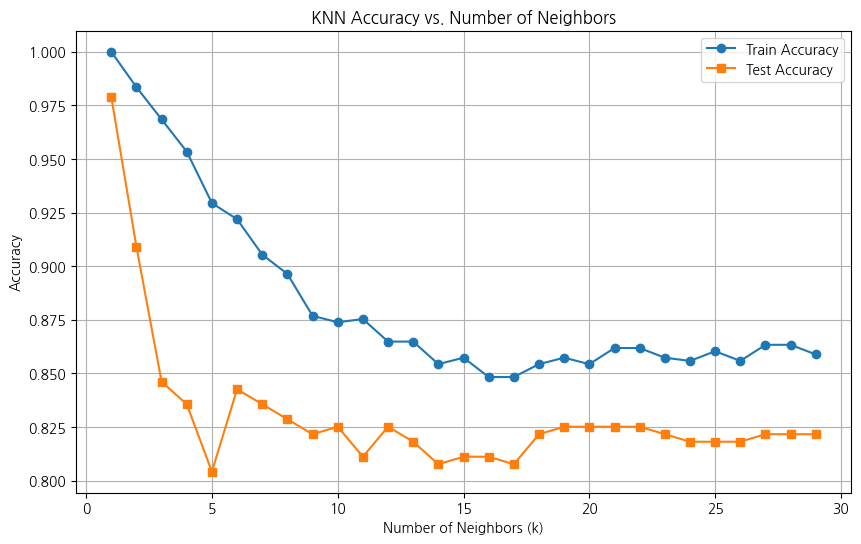

In [289]:
# 그래프를 보면 k=5~10 정도에서 훈련/테스트 정확도의 균형이 적절해 보임. 즉, k=7 또는 k=9

plt.figure(figsize=(10,6))
plt.plot(neighbors, train_score, label="Train Accuracy", marker='o')
plt.plot(neighbors, test_score, label="Test Accuracy", marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.legend()
plt.grid()
plt.show()

In [290]:
knn_clf_h = KNeighborsClassifier(n_neighbors=9)
result_knn_clf_h= knn_clf_h.fit(X_train, y_train)

print_score(knn_clf_h, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf_h, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.69%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.872131    0.880886  0.876877    0.876509      0.876824
recall       0.860841    0.890756  0.876877    0.875799      0.876877
f1-score     0.866450    0.885794  0.876877    0.876122      0.876819
support    309.000000  357.000000  0.876877  666.000000    666.000000
_______________________________________________
Confusion Matrix: 
 [[266  43]
 [ 39 318]]

Test Result:
Accuracy Score: 82.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.813953    0.828025  0.821678    0.820989      0.821531
recall       0.795455    0.844156  0.821678    0.819805      0.821678
f1-score     0.804598    0.836013  0.821678    0.820305      0.821514
support    132.000000  154.000000  0.821678  286.000000    286.

In [291]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

# 새로운 결과 데이터 생성
tuning_results_df_2 = pd.DataFrame([["Tuned K-nearest neighbors", train_score, test_score]], 
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

tuning_results_df = pd.concat([tuning_results_df, tuning_results_df_2], ignore_index=True)

tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,87.987988,83.216783
1,Tuned K-nearest neighbors,92.942943,80.419580


[ ROC 곡선]<hr>
* 로지스틱 다항회귀
* KNN
* SVM
* Decision Tree
* Randomforest
* XGBoost

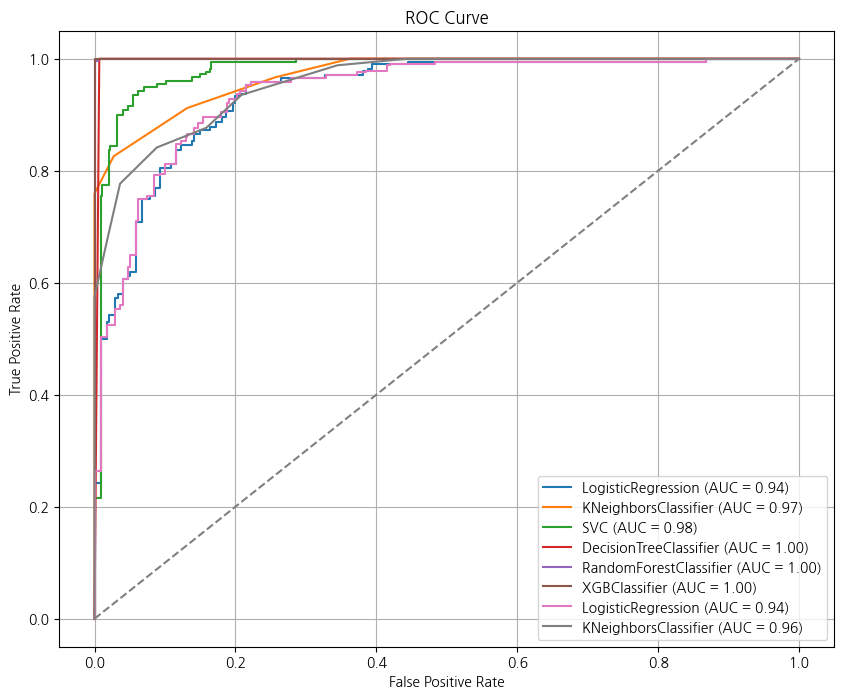

In [292]:
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb
from sklearn.svm import SVC


xgb_clf = xgb.XGBClassifier()
svc_clf = SVC(probability=True)


classification = [lr_clf, knn_clf, svc_clf, tree_clf, rf_clf, xgb_clf, lr_clf_h, knn_clf_h]


plt.figure(figsize=(10, 8))


for clf in classification:
    

    clf.fit(X_train, y_train)
    

    score_clf = clf.predict_proba(X)[:, 1]
    

    fpr_clf, tpr_clf, _ = roc_curve(y, score_clf)

    auc_clf = roc_auc_score(y, score_clf)
    

    plt.plot(fpr_clf, tpr_clf, label=f'{clf.__class__.__name__} (AUC = {auc_clf:.2f})')


plt.plot([0, 1], [0, 1], color='grey', linestyle='--')


plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend(loc='lower right')


plt.grid(True)


plt.show()


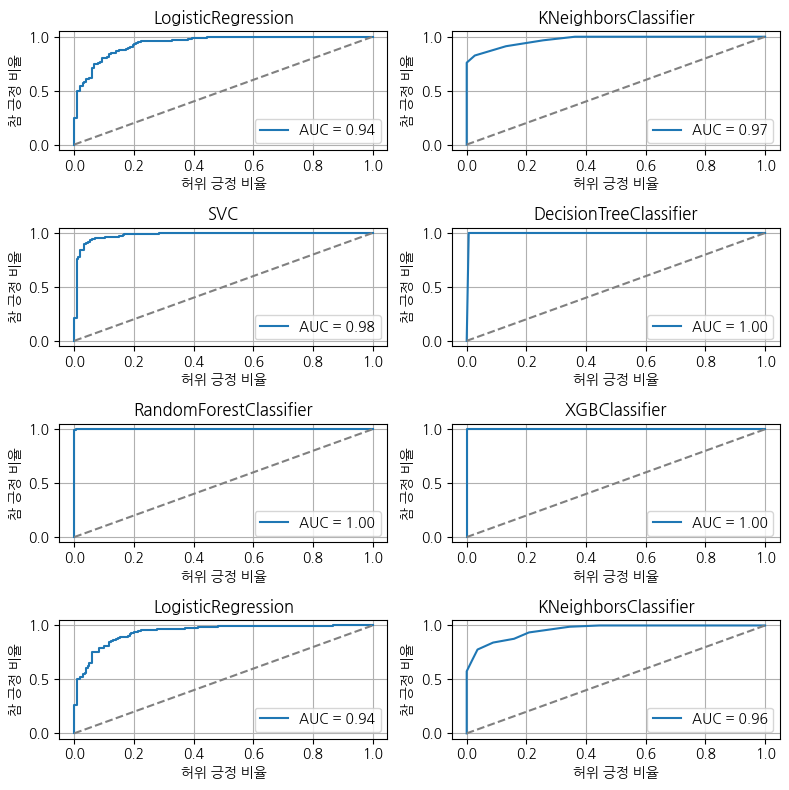

In [293]:
import koreanize_matplotlib

xgb_clf = xgb.XGBClassifier()
svc_clf = SVC(probability=True)


classification = [lr_clf, knn_clf, svc_clf, tree_clf, rf_clf, xgb_clf, lr_clf_h, knn_clf_h]


n = len(classification)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
axes = axes.ravel()


for i, clf in enumerate(classification):
    
    clf.fit(X_train, y_train)
    
    score_clf = clf.predict_proba(X)[:, 1]
    

    fpr_clf, tpr_clf, _ = roc_curve(y, score_clf)
    
 
    auc_clf = roc_auc_score(y, score_clf)
    

    axes[i].plot(fpr_clf, tpr_clf, label=f'AUC = {auc_clf:.2f}')
    axes[i].plot([0, 1], [0, 1], color='grey', linestyle='--')
    axes[i].set_title(f'{clf.__class__.__name__}')
    axes[i].set_xlabel('허위 긍정 비율')
    axes[i].set_ylabel('참 긍정 비율')
    axes[i].legend(loc='lower right')
    axes[i].grid(True)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
plt.show()


[ 교차검증 - SVM]<HR>

In [ ]:
 7.from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# SVM 모델 정의
svm_clf = SVC(kernel='rbf')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100],  # C 값 후보
    'gamma': [0.01, 0.1, 1, 10]  # gamma 값 후보
}

# GridSearchCV 객체 정의 (교차 검증 5번 수행)
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 성능 출력
print("최고 정확도:", grid_search.best_score_)

최적 하이퍼파라미터: {'C': 10, 'gamma': 0.1}
최고 정확도: 0.9519358096734372


In [295]:
from sklearn.model_selection import StratifiedKFold

svm_clf = SVC(kernel='rbf', gamma=0.1, C=100)

# Stratified K-Fold 교차 검증 (5-폴드)
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(svm_clf, X, y, cv=skf, scoring='accuracy')

# 결과 출력
print("교차 검증 점수:", scores)
print("평균 정확도:", scores.mean())

교차 검증 점수: [0.96335079 0.95811518 0.97894737 1.         0.98421053]
평균 정확도: 0.9769247726646458


[ 예측 - SVM ]
* ROC 값 0.97
* train 
                   0           1  accuracy   macro avg  weighted avg
precision    0.953177    0.930481  0.940565    0.941829      0.940969
recall       0.916399    0.961326  0.940565    0.938862      0.940565
f1-score     0.934426    0.945652  0.940565    0.940039      0.940465

test

                    0           1  accuracy   macro avg  weighted avg
precision    0.897810    0.901316  0.899654    0.899563      0.899642
recall       0.891304    0.907285  0.899654    0.899295      0.899654
f1-score     0.894545    0.904290  0.899654    0.899418      0.899637

In [299]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 예측 데이터 불러오기
data = pd.read_csv(r"C:\Users\KDT-37\Desktop\KDT_7\08_ML\project\data\predict.csv")

# 범주형 변수 리스트 설정 (target 제거)
categorical_val = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# One-Hot Encoding 수행
data = pd.get_dummies(data, columns=categorical_val).astype(int)

# 연속형 변수 정규화
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 정규화
data[col_to_scale] = scaler.fit_transform(data[col_to_scale])


# 예측 데이터의 특성 열을 훈련 데이터와 맞추기
# 예측 데이터에서 훈련 데이터에 없는 컬럼을 0으로 채움
predict_dataset = data.reindex(columns=dataset.columns, fill_value=0)


In [300]:
predict_dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.787765,-0.361370,-0.777552,1.541004,-0.367607,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.626997,0.512912,-0.974124,0.868754,1.102822,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,2.106066,0.804340,-1.607523,-0.682592,0.367607,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.659150,0.979197,-0.974124,1.179023,-1.102822,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.819919,0.396341,1.013439,-1.665111,-0.367607,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [302]:
# X, y 분리
X = predict_dataset.drop('target', axis=1)
y = predict_dataset.target

# SVM 모델 훈련
svm_clf = SVC(kernel='rbf', gamma=0.1, C=100, probability=True)
svm_clf.fit(X_train, y_train)  # 훈련 데이터(X_train, y_train)로 모델 훈련

# 예측
predictions = svm_clf.predict(X)

# 예측 확률
probabilities = svm_clf.predict_proba(X)

print(predictions)
print(probabilities)

[0 0 0 0 1 1 0 0 0 0]
[[7.36180305e-01 2.63819695e-01]
 [9.50501559e-01 4.94984415e-02]
 [7.96254423e-01 2.03745577e-01]
 [9.39771763e-01 6.02282370e-02]
 [1.53265933e-01 8.46734067e-01]
 [2.09254361e-02 9.79074564e-01]
 [8.04836289e-01 1.95163711e-01]
 [9.99959115e-01 4.08848356e-05]
 [9.74638253e-01 2.53617470e-02]
 [9.89253882e-01 1.07461179e-02]]


In [305]:
predictions_df = pd.DataFrame({
    'Predicted Class': predictions,
    'Probability Class 0': probabilities[:, 0],
    'Probability Class 1': probabilities[:, 1]
})
predictions_df['Probability Class 0'] = predictions_df['Probability Class 0'].round(2)
predictions_df['Probability Class 1'] = predictions_df['Probability Class 1'].round(2)
# 결과 출력
print(predictions_df)

   Predicted Class  Probability Class 0  Probability Class 1
0                0                 0.74                 0.26
1                0                 0.95                 0.05
2                0                 0.80                 0.20
3                0                 0.94                 0.06
4                1                 0.15                 0.85
5                1                 0.02                 0.98
6                0                 0.80                 0.20
7                0                 1.00                 0.00
8                0                 0.97                 0.03
9                0                 0.99                 0.01
